In [1]:
import torch
import torch.nn as nn
import torchvision
import torch.backends.cudnn as cudnn
import torch.optim
import os
import sys
import argparse
import time

import import_ipynb
import dataloader
import model
import numpy as np
from torchvision import transforms
from PIL import Image
import glob
import time


import cv2 as cv
import cv2 as cv2
import matplotlib.pyplot as plt
import scipy.misc


C:\Users\Jayamohan\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


importing Jupyter notebook from model.ipynb


In [2]:
scale_factor = 12

filePath = 'snapshots/'
file_list = os.listdir(filePath)
print("models", file_list)
    
DCE_net = model.enhance_net_nopool(scale_factor)##.cuda()
model_name = 'Epoch99'
DCE_net.load_state_dict(torch.load('snapshots_Zero_DCE++/'+ model_name +'.pth', map_location=torch.device('cpu')))

models ['Epoch0.pth', 'Epoch1.pth', 'Epoch2.pth', 'Epoch99.pth']


<All keys matched successfully>

<class 'numpy.ndarray'> (480, 640, 3)
0.10199260711669922


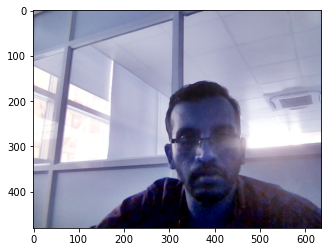

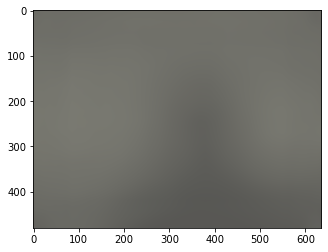

In [16]:
def convertToCV(tensor):
    
    tensor = torch.squeeze(tensor)
    tensor = tensor.cpu().float().detach()
    tensor = torch.unsqueeze(tensor, 0)
    tensor = tensor.permute(1, 2, 0)
    tensor = ((tensor +1)/2.0) * 255.0
    tensor = tensor.numpy()
    return tensor

def enhance_image(frame):
    os.environ['CUDA_VISIBLE_DEVICES']='0'
    scale_factor = 12
    #data_lowlight = Image.open(image_path)
    data_lowlight = frame


    data_lowlight = (np.asarray(data_lowlight)/255.0)


    data_lowlight = torch.from_numpy(data_lowlight).float()

    h=(data_lowlight.shape[0]//scale_factor)*scale_factor
    w=(data_lowlight.shape[1]//scale_factor)*scale_factor
    data_lowlight = data_lowlight[0:h,0:w,:]
    data_lowlight = data_lowlight.permute(2,0,1)
    
    data_lowlight = data_lowlight.unsqueeze(0)
##     DCE_net = model.enhance_net_nopool(scale_factor)##.cuda()

#cuda
#     data_lowlight = data_lowlight.cuda().unsqueeze(0)
# 	DCE_net = model.enhance_net_nopool(scale_factor).cuda()



##     model_name = 'Epoch2'
##     DCE_net.load_state_dict(torch.load('snapshots_Zero_DCE++/'+ model_name +'.pth'))

    start = time.time()
    enhanced_image,params_maps = DCE_net(data_lowlight)

    end_time = (time.time() - start)
    print(end_time)
    
    #preparing le curve map for display
    params_maps = params_maps.detach().numpy()[0]
    params_maps = np.einsum('kij->ijk',params_maps)
    params_maps = ( params_maps + 1 )* 0.5
#     params_maps = params_maps * 255.0
#     params_maps = params_maps * 32.0
#     print (params_maps)
    
    #preparing image for display
    enhanced_image = enhanced_image.detach().numpy()[0]
    enhanced_image = np.einsum('kij->ijk',enhanced_image)
  
    return enhanced_image, params_maps

cap = cv.VideoCapture(0)
ret, frame = cap.read()
cap.release()
print(type(frame), frame.shape)
enhanced_frame, params_map = enhance_image(frame)

imgplot = plt.imshow(enhanced_frame)
plt.show()

plt.imshow(params_map, cmap='magma')
# print (enhanced_frame)

In [5]:
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 30.0, (640, 480))

In [17]:
import cv2 as cv

cap = cv.VideoCapture(0)

display_light_curve_map = False

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    frame_orig = frame.copy()
#     cv.imshow("original", frame)
    
#     # normalize the frame
    enhanced_frame, light_curve_map = enhance_image(frame)
#     # Display the resulting frame
     
    
    
    frame_orig = frame_orig[:,:-4] / 255
    
    #light enhancement curve map
    if display_light_curve_map == False:
        v_img = np.concatenate([frame_orig, enhanced_frame], axis=1)
    else:
        v_img = np.concatenate([frame_orig, light_curve_map, enhanced_frame], axis=1)
    cv.imshow("enhanced", v_img)

    # press q to quit
    if cv.waitKey(1) & 0xFF == ord("q"):
        break
        
    #press l to enable light enhancement curve map
    if cv.waitKey(1) & 0xFF == ord("l"):
        display_light_curve_map = not display_light_curve_map 

#     if cv.waitKey(1) & 0xFF == ord("s"):
#        # output the frame
#     out.write(v_img) 

        
cap.release()
cv.destroyAllWindows()

out.release()

0.10430383682250977
0.11777353286743164
0.09418320655822754
0.11489391326904297
0.1187593936920166
0.12842869758605957
0.09445309638977051
0.11679816246032715
0.11133337020874023
0.10921001434326172
0.10943126678466797
0.11074566841125488
0.1234598159790039
0.1177973747253418
0.09423398971557617
0.10982751846313477
0.10315442085266113
0.11495637893676758
0.10723876953125
0.10175800323486328
0.09422445297241211
0.10877251625061035
0.11247682571411133
0.11540102958679199
0.09421229362487793
0.0964193344116211
0.10025238990783691
0.10981488227844238
0.1098487377166748
0.1098489761352539
0.10988187789916992
0.08562469482421875
0.10986948013305664
0.1098623275756836
0.10992169380187988
0.10782027244567871
0.11118674278259277
0.10314130783081055
0.09419989585876465
0.11118578910827637
0.11037158966064453
0.0909423828125
0.09421300888061523
0.10625076293945312
0.10983848571777344
0.10938286781311035
0.10980439186096191
0.09058785438537598
0.10985994338989258
0.09367156028747559
0.094276189804